## Example d'utilisation de la classe ModelLearning ou de toute classe enfant

In [2]:
import numpy as np
import math
import time
import pandas as pd
from tqdm import tqdm
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import data
import features
from model_tree_regressor import ModelTreeRegressor

In [3]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)
all_features = features.load_all_features(dico, temp, remove_useless=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:10<00:00, 23.88it/s]


All the features have been loaded in 10.05 sec
16 useless features have been removed. There are now 17 features for each setting.


In [4]:
model = ModelTreeRegressor(all_features, output)

In [4]:
model.load_train_test_set(output_var='Q_total_AC_kW')

In [5]:
model.fit_model()

In [6]:
model.test_model()  # On peut sortir tout type de mesures

{'mse': 111.96512635488601}

In [7]:
output_names = list(model.output['fields'].keys())

models = {}
for o in output_names:
    print("Learning on '{}'...".format(o))
    
    model.load_train_test_set(output_var=o, pct_train=1.)
    model.fit_model()
    models[o] = model.model

Learning on 'office_temperature_degreC'...
Learning on 'Q_total_heating_kW'...
Learning on 'Q_total_AC_kW'...
Learning on 'Q_total_gains_kW'...
Learning on 'Q_total_kW'...


In [8]:
X_val = features.load_data_features('./data/test_input.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:01<00:00, 25.83it/s]


All the features have been loaded in 1.4 sec
16 useless features have been removed. There are now 17 features for each setting.


In [10]:
model.save_output(models, './data/test.csv', X_val)

100%|███████████████████████████████████████████████████████████████████████| 314496/314496 [00:11<00:00, 26431.68it/s]


File saved at './data/test.csv'


## Un exemple test/train

In [10]:
model = ModelTreeRegressor(all_features, output)

** Q_total_AC_kW **

In [11]:
model.train_model_to_plot('Q_total_AC_kW')

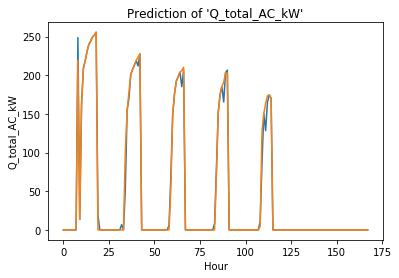

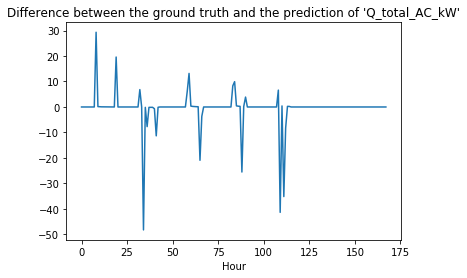

In [12]:
num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

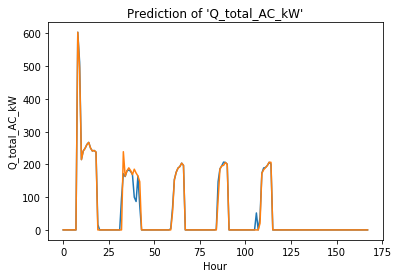

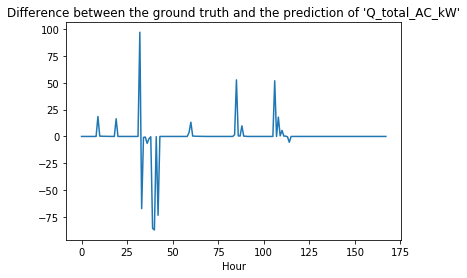

In [13]:
num_sem = 33
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

** Q_total_heating_kW **

In [14]:
model.train_model_to_plot('Q_total_AC_kW')

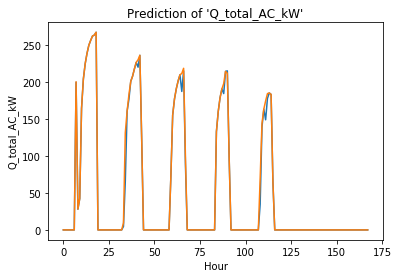

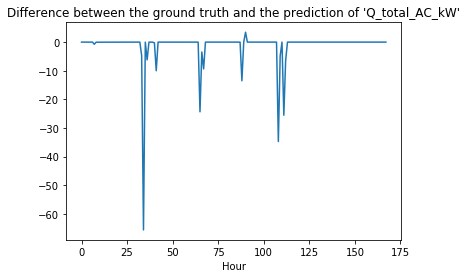

In [15]:
num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

** Q_total_gains_kW**

In [16]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

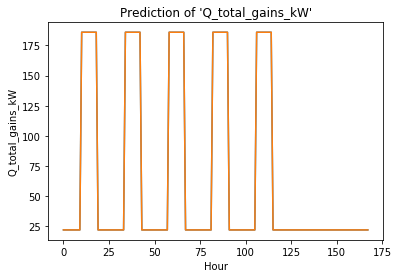

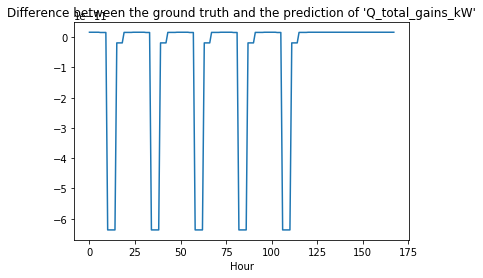

In [17]:
model.train_model_to_plot('Q_total_gains_kW')

num_sem = 25
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

** Q_total_kW**

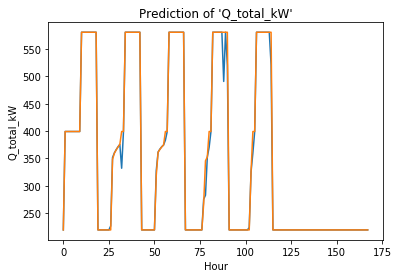

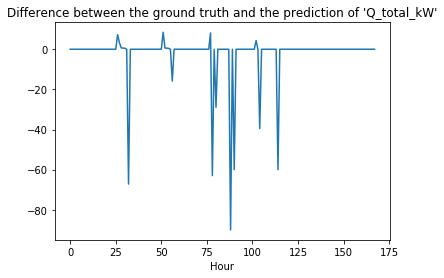

In [18]:
model.train_model_to_plot('Q_total_kW')

num_sem = 155
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

**office_temperature_degreC**

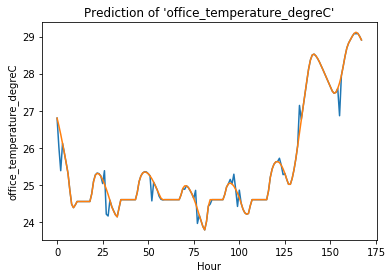

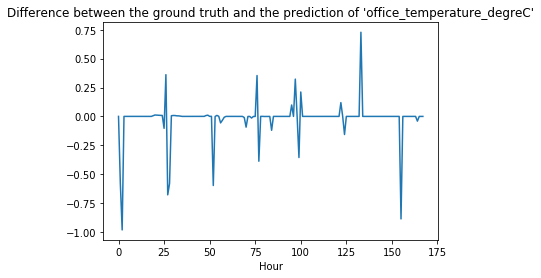

In [20]:
model.train_model_to_plot('office_temperature_degreC')

num_sem = 500
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

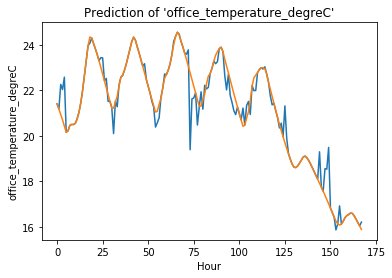

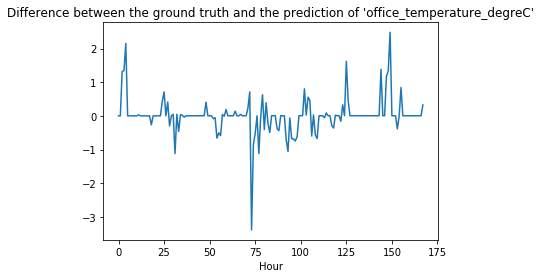

In [21]:
num_sem = 250
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)